# Embedding space

This document will explore the training and analysis of our embedding space.

In [1]:
%pip install scipy==1.10.0
%pip install gensim
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install pacmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 6.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 40.1 MB/s eta 0:00:0031m44.5 MB/s eta 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 67.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 12.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 50.8 MB/s eta 0:00:00m eta 0:

In [2]:
import csv
import pandas as pd
from gensim.test.utils import datapath
from gensim import utils
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt



In [5]:
with open('../Data/sequences.csv', 'r') as f:
    reader = csv.reader(f)
    sequences = list(reader)

# Model

In [5]:
model = Word2Vec(sentences=sequences,   # This is the data that we wish to create notes on. This will take all unique words (stations) and put them in the NN
                 vector_size=300,       # Amount of dimension
                 min_count=10,          # If the number of occurences of this station is less than 10, then we are not interested in having it in our embedding. -- THIS NEED TO BE LOOKED AT
                 workers=4              # Amount of cores used for training and so forth.
                 )         

model.build_vocab(sequences)
model.train(sequences, total_examples=model.corpus_count, epochs=1)


(78611, 160360)

In [22]:
model.wv.vectors

array([[ 0.03244122,  0.12160822, -0.00545629, ...,  0.00645795,
         0.15663713, -0.16637014],
       [ 0.03892565,  0.12825562,  0.00079914, ..., -0.08008432,
         0.1409931 , -0.10508603],
       [ 0.02159134,  0.12000423, -0.01849766, ..., -0.06738248,
         0.15782474, -0.11594489],
       ...,
       [ 0.00053952,  0.04195056,  0.0040848 , ..., -0.01217843,
         0.04050147, -0.03730068],
       [ 0.000312  ,  0.03315017, -0.00050847, ..., -0.01197318,
         0.03040095, -0.03139995],
       [-0.00246688,  0.0474292 , -0.00158858, ..., -0.01507242,
         0.04473767, -0.04527939]], dtype=float32)

# Vanløse test case

In [28]:

from collections import Counter

# Initialize a Counter to store station counts
station_counter = Counter()
list_of_stations_with_vanløse = []

# Iterate over each journey list
for journey in sequences:
    # Check if 'Vanløse St.' is present in the journey
    if 'Vanløse St.' in journey:
        # Iterate over each station in the journey
        for station in journey:
            # Exclude 'Vanløse St.' from counting
            if station != 'Vanløse St.':
                # Increment the count for the station
                station_counter[station] += 1

# Sort the station counts by count (descending order)
sorted_stations = sorted(station_counter.items(), key=lambda x: x[1], reverse=True)
for sta in sorted_stations:
    if sta[1] > 7:
        list_of_stations_with_vanløse.append(sta[0])

# Print the station counts
for station, count in sorted_stations:
    print(f"{station}: {count}")


Nørreport St.: 81
Kongens Nytorv St. (Metro): 63
CPH Lufthavn: 60
København H: 51
Amagerbro St. (Metro): 25
Forum St. (Metro): 23
Nørreport St. (Metro): 22
Carlsberg St.: 18
Christianshavn St. (Metro): 17
Dybbølsbro St.: 17
Christianshavn St.: 16
København H (Metro): 16
Trianglen St. (Metro): 15
Rådhuspladsen St. (Metro): 13
Bella Center St. (Metro): 12
Ørestad St. (Metro): 11
Kongens Nytorv: 11
Amager Strand St. (Metro): 10
Øresund St. (Metro): 9
Ørestad St.: 9
Forum St.: 8
Nordhavn St.: 8
Vesterport St.: 8
Islands Brygge St. (Metro): 8
Vestamager St. (Metro): 8
Femøren St. (Metro): 7
Vestamager St.: 7
Enghave Plads St.: 5
Nørre Farimagsgade: 4
Østerport St.: 4
Enghave Plads St. (Metro): 4
Rådhuspladsen: 4
Lergravsparken St. (Metro): 4
Kastrup St. (Metro): 4
Trianglen St.: 4
Frederiksberg Allé St. (Metro): 3
Sundby St. (Metro): 3
Wibrandtsvej: 2
Refshaleøen: 2
Fasanvej St. (Metro): 2
H.C. Ørsteds Vej: 2
Smyrnavej: 2
DR Byen St. (Metro) (01/03): 2
Kastruplundgade: 2
Orientkaj St. (Metr

In [29]:
list_of_stations_with_vanløse

['Nørreport St.',
 'Kongens Nytorv St. (Metro)',
 'CPH Lufthavn',
 'København H',
 'Amagerbro St. (Metro)',
 'Forum St. (Metro)',
 'Nørreport St. (Metro)',
 'Carlsberg St.',
 'Christianshavn St. (Metro)',
 'Dybbølsbro St.',
 'Christianshavn St.',
 'København H (Metro)',
 'Trianglen St. (Metro)',
 'Rådhuspladsen St. (Metro)',
 'Bella Center St. (Metro)',
 'Ørestad St. (Metro)',
 'Kongens Nytorv',
 'Amager Strand St. (Metro)',
 'Øresund St. (Metro)',
 'Ørestad St.',
 'Forum St.',
 'Nordhavn St.',
 'Vesterport St.',
 'Islands Brygge St. (Metro)',
 'Vestamager St. (Metro)']

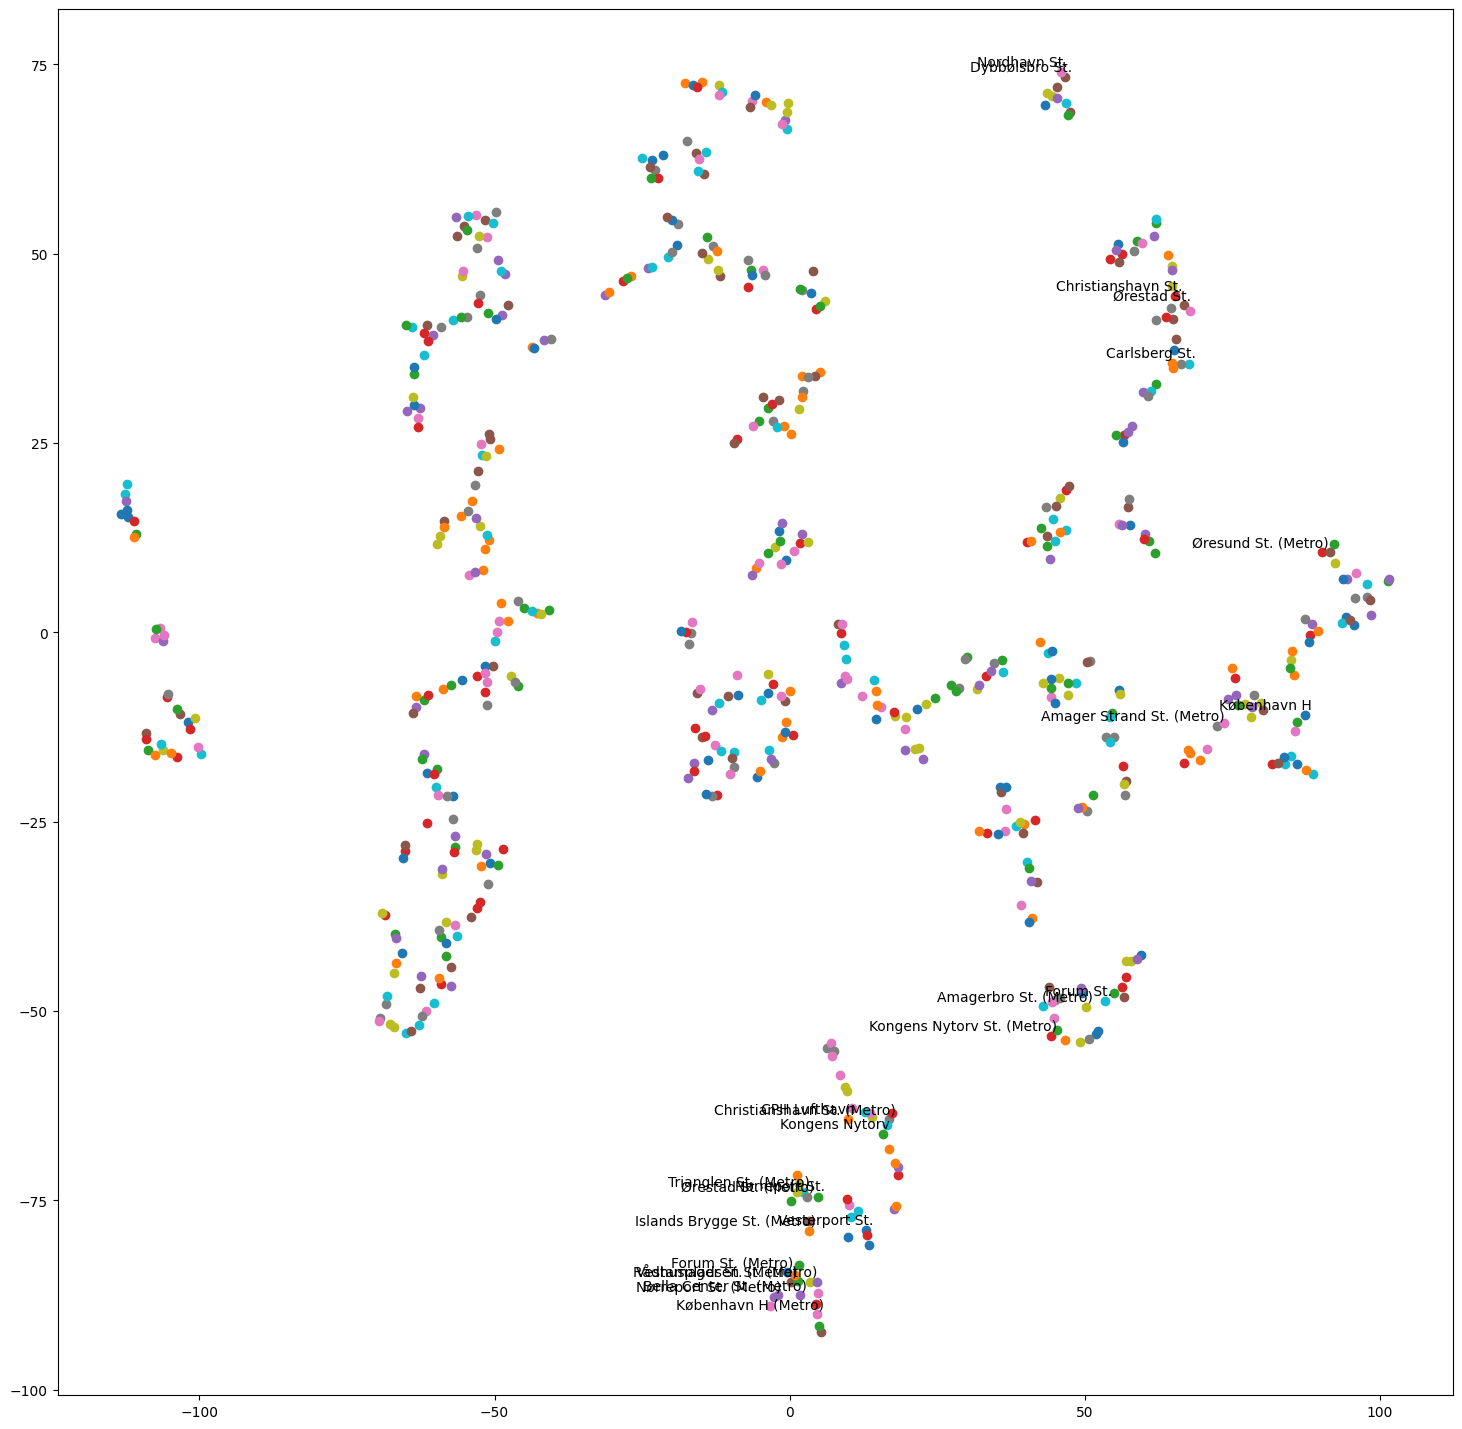

In [30]:
from matplotlib import pyplot as plt


def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        if(word) in list_of_stations_with_vanløse:
            labels.append(word)
        else:
            labels.append(None)
       
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
   
tsne_plot(model)

# København H (Metro) Test

In [9]:

from collections import Counter

# Initialize a Counter to store station counts
station_counter_kbh_metro = Counter()
list_of_stations_with_kbh_metro = []

# Iterate over each journey list
for journey in sequences:
    if 'København H (Metro)' in journey:
        # Iterate over each station in the journey
        for station in journey:
            if station != 'København H (Metro)':
                station_counter_kbh_metro[station] += 1

# Sort the station counts by count (descending order)
sorted_stations_kbh = sorted(station_counter_kbh_metro.items(), key=lambda x: x[1], reverse=True)
for sta in sorted_stations_kbh:
    if sta[1] > 7:
        list_of_stations_with_kbh_metro.append(sta[0])

# Print the station counts
for station, count in sorted_stations_kbh:
    print(f"{station}: {count}")


Kongens Nytorv St. (Metro): 230
Trianglen St. (Metro): 123
Nørrebro St.: 121
Marmorkirken St. (Metro): 108
Frederiksberg St. (Metro): 88
Nørrebros Runddel St. (Metro): 64
Skjolds Plads St. (Metro): 62
Nørreport St.: 60
Nuuks Plads St. (Metro): 57
Gammel Strand St. (Metro): 56
Sydhavn St.: 48
Valby St.: 48
Poul Henningsens Plads St. (Metro): 48
Christianshavn St. (Metro): 47
Lergravsparken St. (Metro): 46
Nordhavn St. (Metro): 46
Nordhavn St.: 43
Orientkaj St. (Metro): 42
CPH Lufthavn: 41
Frederiksberg Allé St. (Metro): 40
Østerport St.: 40
Vibenshus Runddel St. (Metro): 40
Enghave Plads St. (Metro): 39
Ørestad St.: 34
Ørestad St. (Metro): 32
Østerport St. (Metro): 32
Bella Center St. (Metro): 32
Aksel Møllers Have St. (Metro): 32
Hellerup St.: 31
Nørrebro St. (Metro): 28
Amagerbro St. (Metro): 28
Rådhuspladsen: 23
DR Byen St. (Metro) (01/03): 23
Islands Brygge St. (Metro): 23
Øresund St. (Metro): 21
Ny Ellebjerg St.: 20
Hvidovre St.: 20
Husum St.: 19
Nyhavn: 19
Femøren St. (Metro): 17


In [10]:
list_of_stations_with_kbh_metro

['Kongens Nytorv St. (Metro)',
 'Trianglen St. (Metro)',
 'Nørrebro St.',
 'Marmorkirken St. (Metro)',
 'Frederiksberg St. (Metro)',
 'Nørrebros Runddel St. (Metro)',
 'Skjolds Plads St. (Metro)',
 'Nørreport St.',
 'Nuuks Plads St. (Metro)',
 'Gammel Strand St. (Metro)',
 'Sydhavn St.',
 'Valby St.',
 'Poul Henningsens Plads St. (Metro)',
 'Christianshavn St. (Metro)',
 'Lergravsparken St. (Metro)',
 'Nordhavn St. (Metro)',
 'Nordhavn St.',
 'Orientkaj St. (Metro)',
 'CPH Lufthavn',
 'Frederiksberg Allé St. (Metro)',
 'Østerport St.',
 'Vibenshus Runddel St. (Metro)',
 'Enghave Plads St. (Metro)',
 'Ørestad St.',
 'Ørestad St. (Metro)',
 'Østerport St. (Metro)',
 'Bella Center St. (Metro)',
 'Aksel Møllers Have St. (Metro)',
 'Hellerup St.',
 'Nørrebro St. (Metro)',
 'Amagerbro St. (Metro)',
 'Rådhuspladsen',
 'DR Byen St. (Metro) (01/03)',
 'Islands Brygge St. (Metro)',
 'Øresund St. (Metro)',
 'Ny Ellebjerg St.',
 'Hvidovre St.',
 'Husum St.',
 'Nyhavn',
 'Femøren St. (Metro)',
 'Am

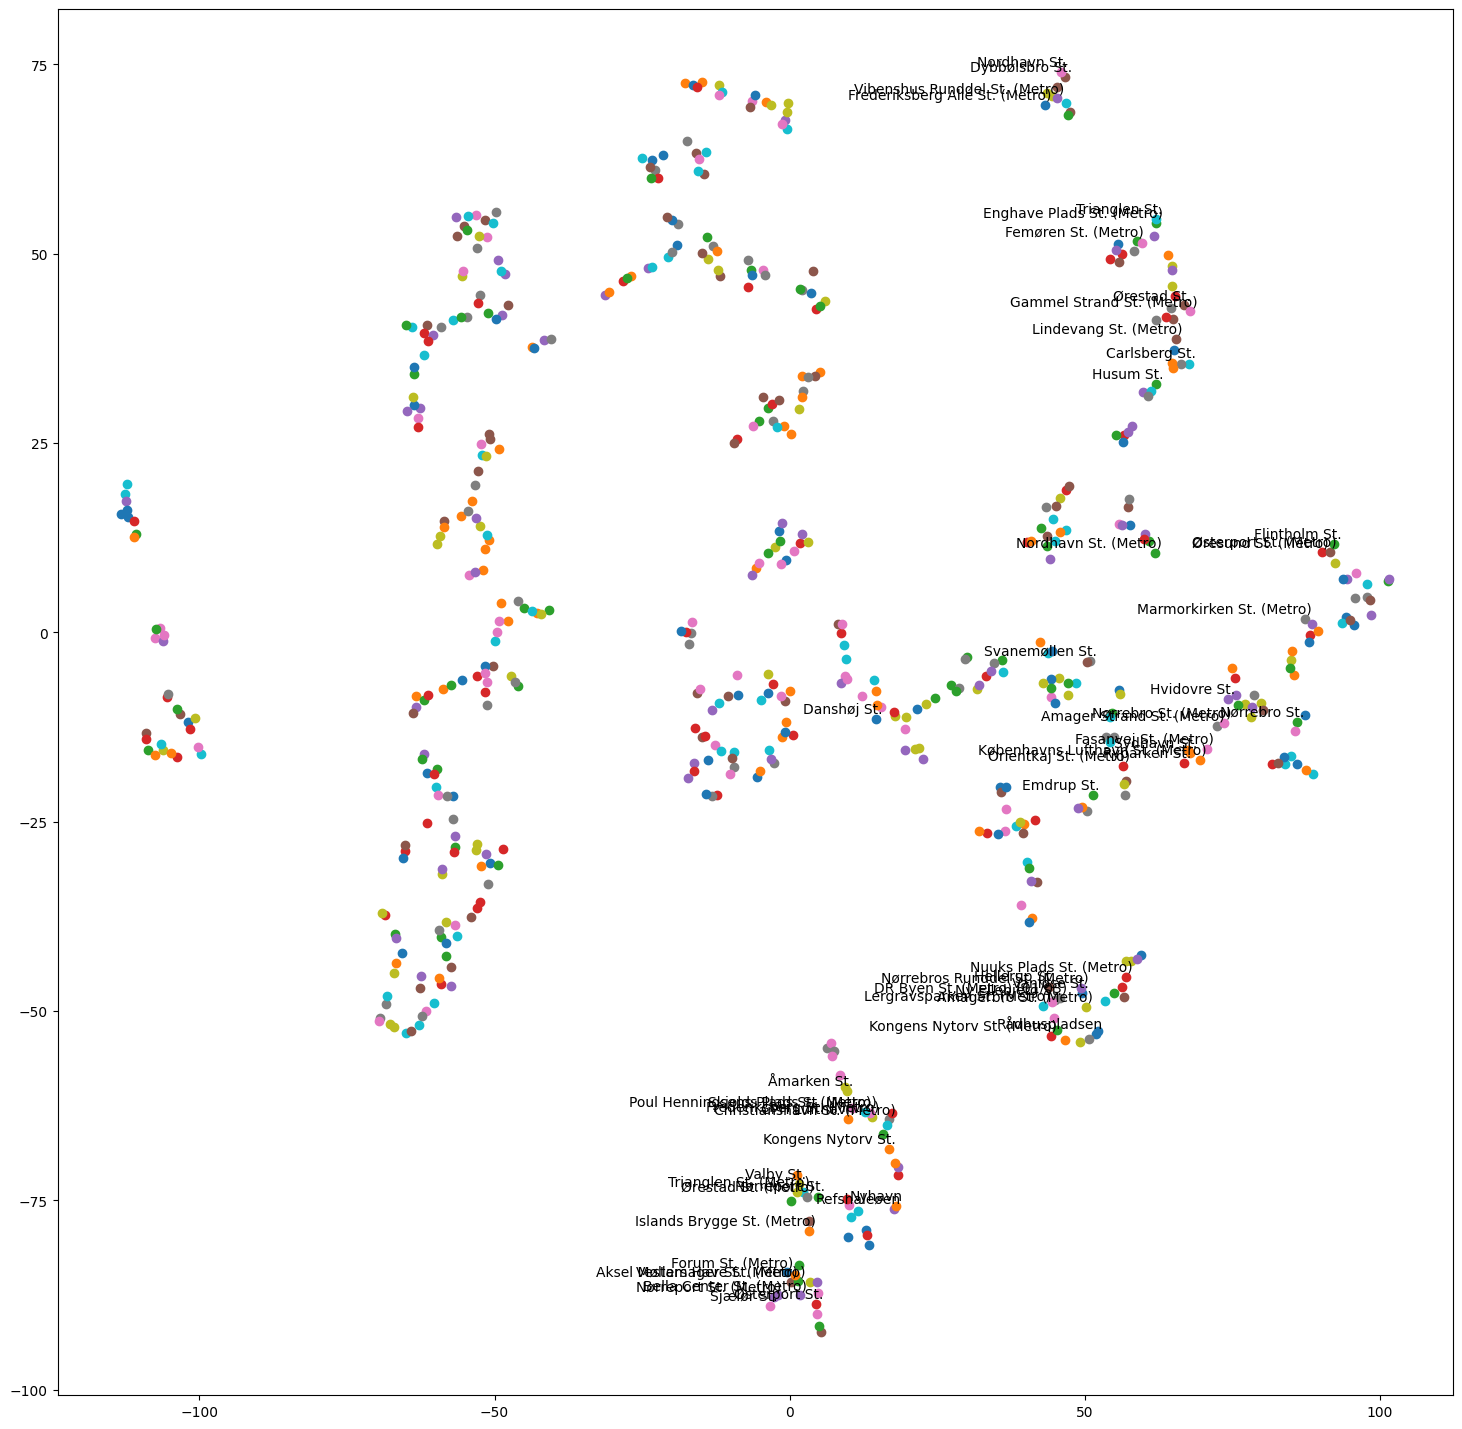

In [34]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        if(word) in list_of_stations_with_kbh_metro:
            labels.append(word)
        else:
            labels.append(None)
       
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
   
tsne_plot(model)

# General

Reference: ```https://towardsdatascience.com/visualizing-your-embeddings-4c79332581a9```
#### Embedding space

***Mathematical intuition***: Given two points Xi, Xj, the farther they are, the higher their distance dj|i, the higher their dissimilarity, and the lower the probability that they will consider each other neighbors.

***Key concept***: the further away two embeddings are in the space, the more dissimilar they are.

#### Perplexity
***Mathematical intuition***: The higher the perplexity, the more likely it is to consider points that are far away as neighbors.

***Advice***: The authors of SNE and t-SNE (yes, t-SNE has perplexity as well) use perplexity values between five and 50.

# More trained model

In [5]:
model_new = Word2Vec(sentences=sequences,   # This is the data that we wish to create notes on. This will take all unique words (stations) and put them in the NN
                 vector_size=300,       # Amount of dimension
                 min_count=10,          # If the number of occurences of this station is less than 10, then we are not interested in having it in our embedding. -- THIS NEED TO BE LOOKED AT
                 workers=4              # Amount of cores used for training and so forth.
                 )         

model_new.build_vocab(sequences)
model_new.train(sequences, total_examples=model.corpus_count, epochs=1000)

NameError: name 'model' is not defined

In [7]:
model_new.wv.vectors

array([[ 0.10799988,  0.01763444,  0.1304798 , ..., -0.1294592 ,
         0.17266123, -0.23639067],
       [ 0.22857773,  0.12283994,  0.04028238, ...,  0.23511072,
         0.03737358, -0.12567341],
       [-0.12649308, -0.11971781,  0.00666637, ...,  0.114334  ,
         0.27918094,  0.02620219],
       ...,
       [ 0.12776276,  0.6130204 ,  0.16953748, ...,  0.15768489,
        -0.09622067, -0.32679915],
       [-0.50408095,  0.16028695,  0.06800357, ..., -0.47158647,
         0.4161812 , -0.39206526],
       [-0.26041976,  0.07367858,  0.27736416, ..., -0.02807952,
         0.2684761 ,  0.0625515 ]], dtype=float32)

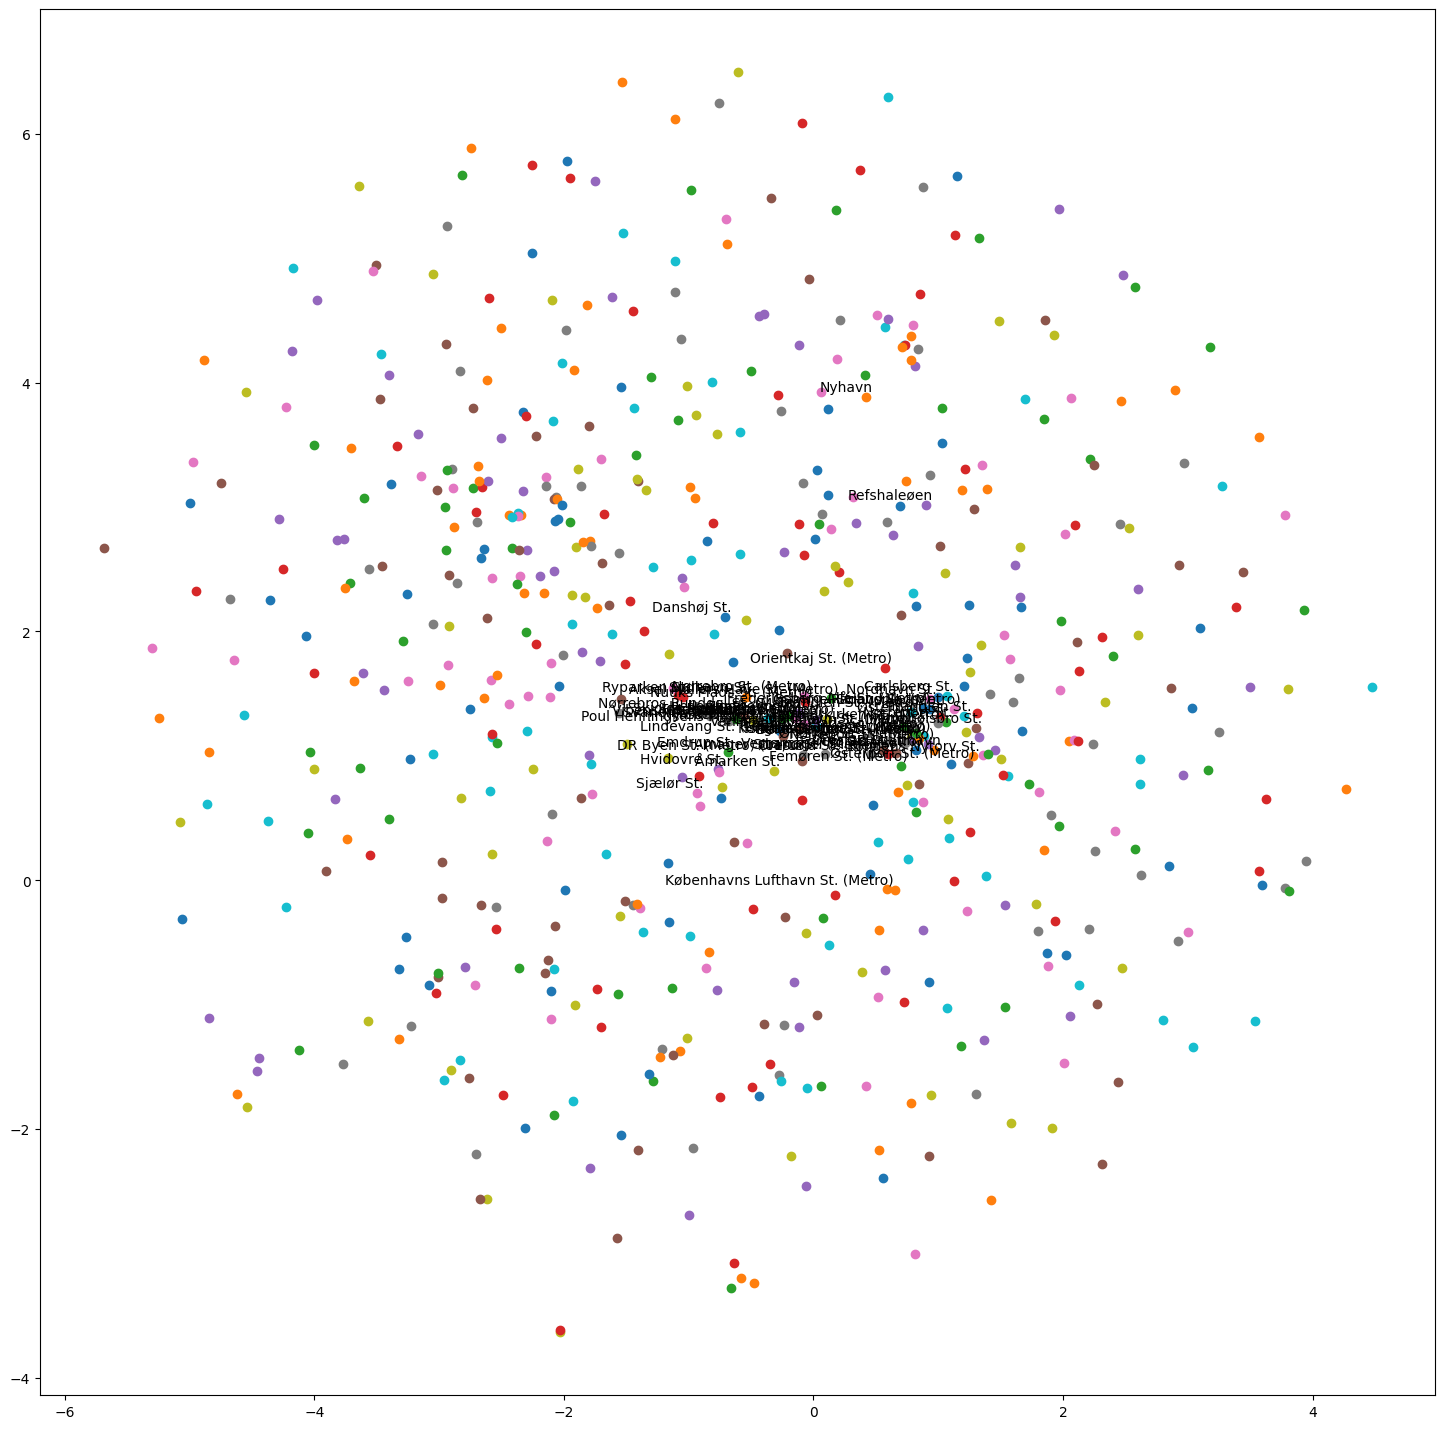

In [12]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model_new.wv.index_to_key:
        tokens.append(model_new.wv[word])
        if(word) in list_of_stations_with_kbh_metro:
            labels.append(word)
        else:
            labels.append(None)
       
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
   
tsne_plot(model_new)

# Testing using PaCMAP


In [6]:
%pip install pacmap


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Visualizing with model of all journeys cph trained 5000 times

In [7]:
model_all = Word2Vec.load("../Data/word2vec_epoch_5000.model")

## paCMAP

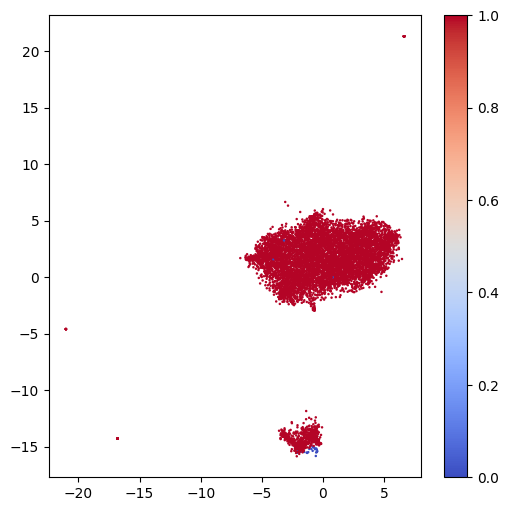

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pacmap

# Assuming model_new is your Word2Vec model
station_names = model_all.wv.index_to_key

# Generate labels based on whether "metro" is in the station name
labels = []
for station_name in station_names:
    if "metro" in station_name.lower():
        labels.append("Metro")
    else:
        labels.append("Non-Metro")

# Convert labels to numerical format
label_encoder = LabelEncoder()
label_encoder.fit(labels)
numeric_labels = label_encoder.transform(labels)

# Convert Word2Vec vectors to numpy array
X = model_all.wv.vectors

# Initializing the PaCMAP instance
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 

# Fit the data
X_transformed = embedding.fit_transform(X, init="pca")

# Visualize the embedding with different colors for "Metro" and "Non-Metro" stations
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=numeric_labels, cmap='coolwarm', s=0.6)
plt.colorbar(scatter, ax=ax)

plt.show()


## T-SNE

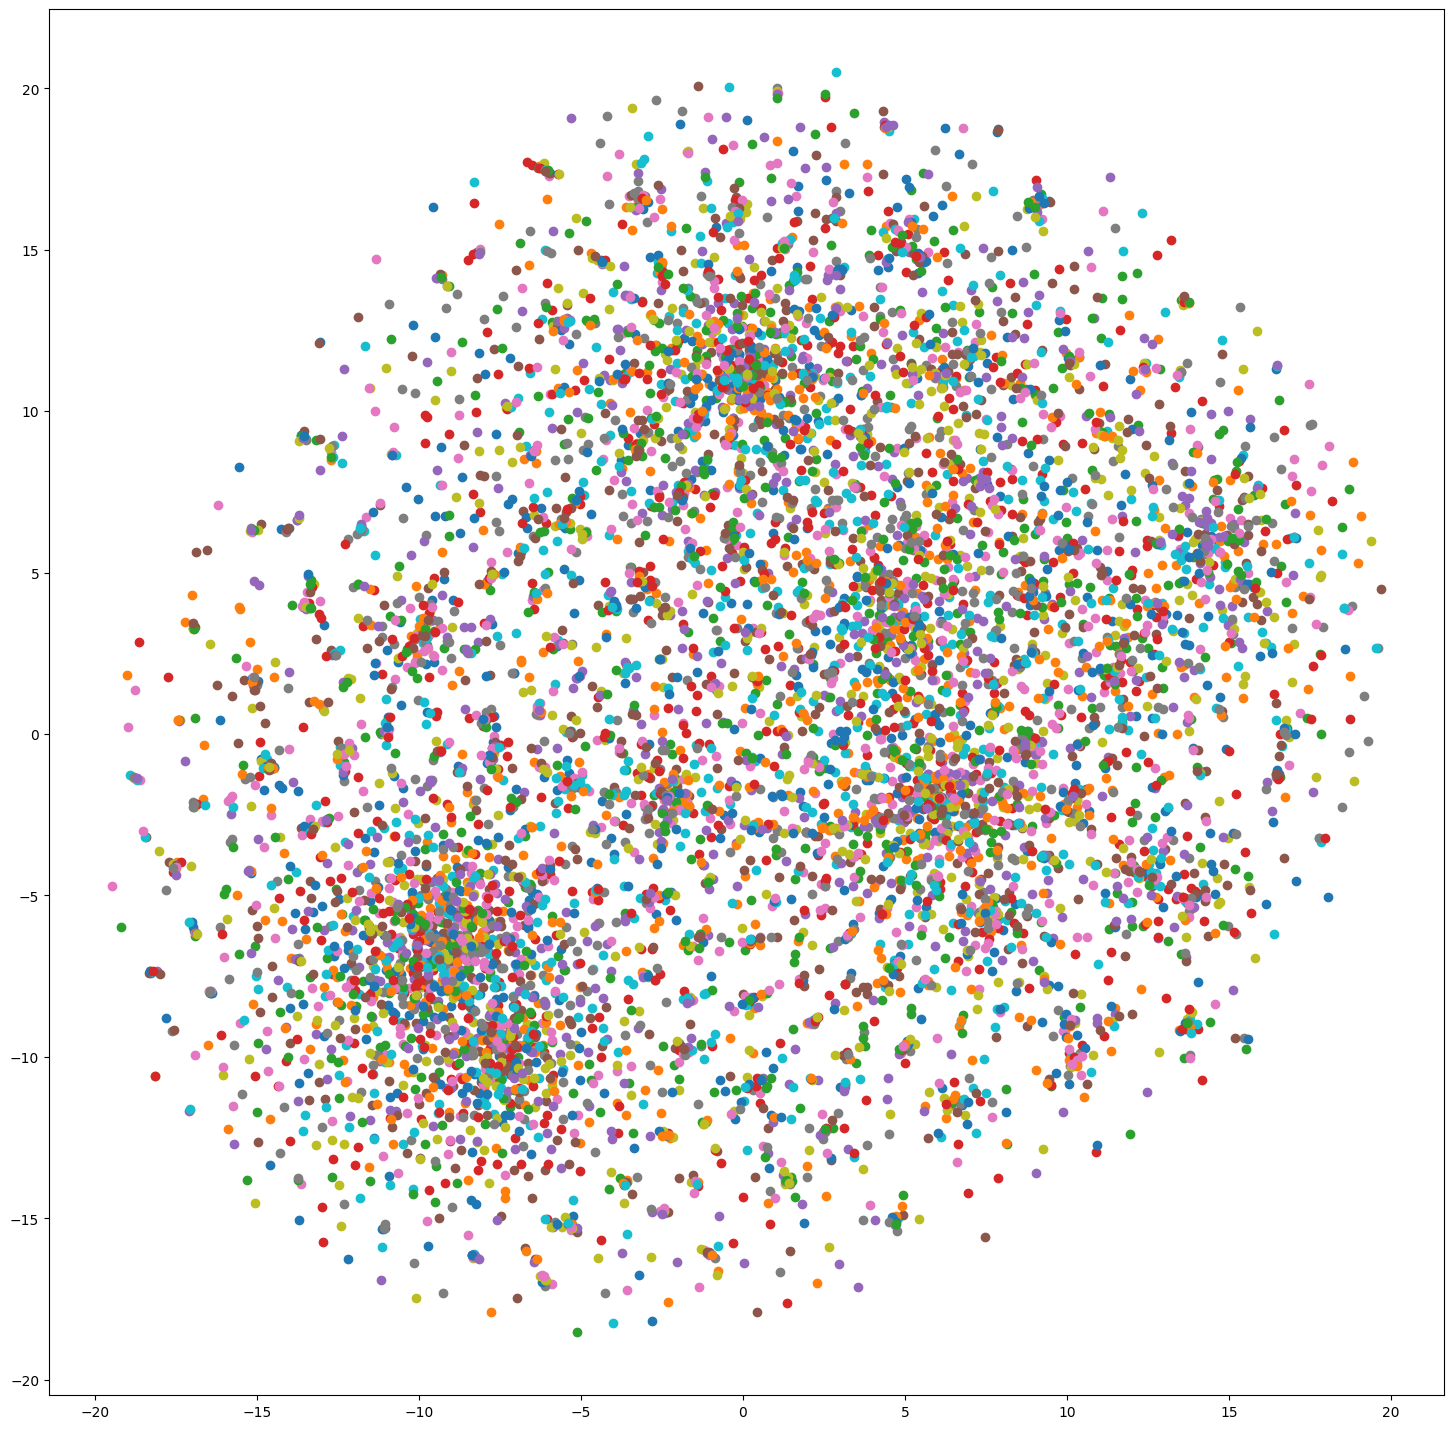

In [15]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        #labels.append(word)
       
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        # plt.annotate(labels[i],
        #             xy=(x[i], y[i]),
        #             xytext=(5, 2),
        #             textcoords='offset points',
        #             ha='right',
        #             va='bottom')
    plt.show()
   
tsne_plot(model_all)